## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Three
# Solution of the linear, Gaussian inverse problem, Viewpoint 1: The length method

### 3.1 The lengths estimates

The simplest of methods for solving the linear inverse problem **Gm=d** is based on measures of the size, or length, of the estimated model parameters $\mathbf{m}^{\text{est}}$ and of the predicted data $\mathbf{d}^{\text{pre}}=\mathbf{Gm}^{\text{est}}$.  

To see that measures of length can be relevant to the solution of inverse problems, consider the simple problem of fitting a straight line to data.  This problem is often solved by the so-called method of least squares.  In this method, one tries to pick the model parameters (intercept and slope) so that the predicted data are as close as possible to the observed data.  For each observation, one defines a prediction error, or misfit, $e_i=d_i^{\text{obs}}-d_i^{\text{pre}}$.  The best-fit line is then the one with model parameters that lead to the smallest overall error *E*, defined as  

\begin{equation*}
E = \sum_{i=1}^N e_i^2 = \mathbf{e}^{\text{T}} \mathbf{e}
\end{equation*}  

The total error *E* (the sum of the squares of the individual errors) is exactly the squared Euclidean length of the vector **e**, or $E = \mathbf{e}^{\text{T}} \mathbf{e}$.  

The method of least squares estimates the solution of an inverse problem by finding the model parameters that minimize a particular measure of the length of the prediction error, $\mathbf{e} = \mathbf{d}^{\text{obs}}-\mathbf{d}^{\text{pre}}$, namely, its Euclidean length.  As will be detailed below, it is the simplest of the methods that use measures of length as the guiding principle in solving an inverse problem.  

IndexError: index 870 is out of bounds for axis 0 with size 30

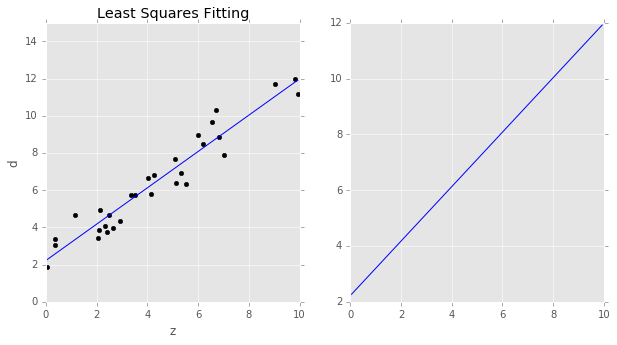

In [1]:
# least squares fit of synthetic data

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# simulate independent variable
z = np.sort(np.random.uniform(0, 10, 30))

# simulate dependent/observed variable
# d = a + b*z + noise
dobs = 2.0 + 1.0 * z + np.random.normal(0,1.0,30)

# least squares fit
M = 2
G = np.array([np.ones(30), z])
mest = inv(G.dot(np.transpose(G))).dot(G.reshape(2,30).dot(dobs)).reshape(2,1)

# predicted data & error
dpre = np.transpose(G).dot(mest)
e = dobs - dpre

# maximum error
iemax = abs(e).argmax()
emax = np.max(abs(e))

# build figure
plt.subplots(1,2, figsize=(10,5))

# PLOT 1: Simulated data and least squares solution
plt.subplot(121)

# simulated data
plt.scatter(z, dobs, color="black")

# least squares solution
plt.plot(z, dpre, color="blue")

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Least Squares Fitting')
plt.xlabel('z')
plt.ylabel('d')

# PLOT 2: Least squares solution demonstrating error as difference between observed and predicted datum
ax = plt.subplot(122)

# least squares solution
plt.plot(z, dpre, color="blue")

# annotating lines
plt.plot([z[iemax], z[iemax]], [dpre[iemax], dobs[iemax]], color="red", lw=5)
plt.plot([z[iemax], z[iemax]], [0,dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dpre[iemax], dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dobs[iemax], dobs[iemax]], color="black", ls='dashed')
plt.scatter([z[iemax]], [dobs[iemax]], color="blue", s=100)
ax.text(z[iemax]-0.75, (dobs[iemax]+dpre[iemax])/2, '$e_i$', fontsize=12)
ax.text(2, dobs[iemax]+0.5, '$d_i^{obs}$', fontsize=12)
ax.text(2, dpre[iemax]-1, '$d_i^{pre}$', fontsize=12)
ax.text(z[iemax]-0.75, 2, '$z_i$', fontsize=12)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Error Definition')
plt.xlabel('z')
plt.ylabel('d')

### 3.2 Measures of length  

Note that although the Euclidean length is one way of quantifying the size or length of a vector, it is by no means the only possible measure.  For instance, one could equally well quantify length by summing the absolute values of the elements of a vector.  

The term *norm* is used to refer to some measure of length or size and is indicated by a set of double vertical bars; that is, ||**e**|| is the norm of the vector **e**.  The most commonly employed norms are those based on the sum of some power of the elements of a vector and are given the name $L_n$, where *n* is the power.  

\begin{equation*}
L_1 \: \text{norm:} \qquad \| \mathbf{e} \|_1 = \left[ \sum_i \left| e_i \right|^1 \right] \\
L_2 \: \text{norm:} \qquad \| \mathbf{e} \|_2 = \left[ \sum_i \left| e_i \right|^2 \right]^{1/2} \\
L_n \: \text{norm:} \qquad \| \mathbf{e} \|_n = \left[ \sum_i \left| e_i \right|^n \right]^{1/n} \\
\end{equation*}  

Successively higher norms give the largest element of **e** successively larger weight.  The limiting case of $n \rightarrow \infty$ gives nonzero weight to only the largest element; therefore, it is equivalent to the selection of the vector element with largest absolute value as the measure of length and is written as  

\begin{equation*}
L_\infty \: \text{norm:} \qquad \| \mathbf{e} \|_\infty = \max_i \left| e_i \right|
\end{equation*}  

The method of least squares uses teh $L_2$ norm to quantify length.  It is appropriate to inquire why this, and not some other choice of norm, is used.  The answer involves the way in which one chooses to weight data *outliers* that fall far from the average trend.  If the data are very accurate, then the fact that one prediction falls far from its observed value is important.  A high-order norm is used, since it weights the larger errors preferentially.  On the other hand, if the data are expected to scatter widely about the trend, then no significance can be placed upon a few large prediction errors.  A low-order norm is used, since it gives more equal weight to errors of different sizes.  

Norms
 E1: 15.6909188843 E2: 3.12420194117 E10: 1.06607382059


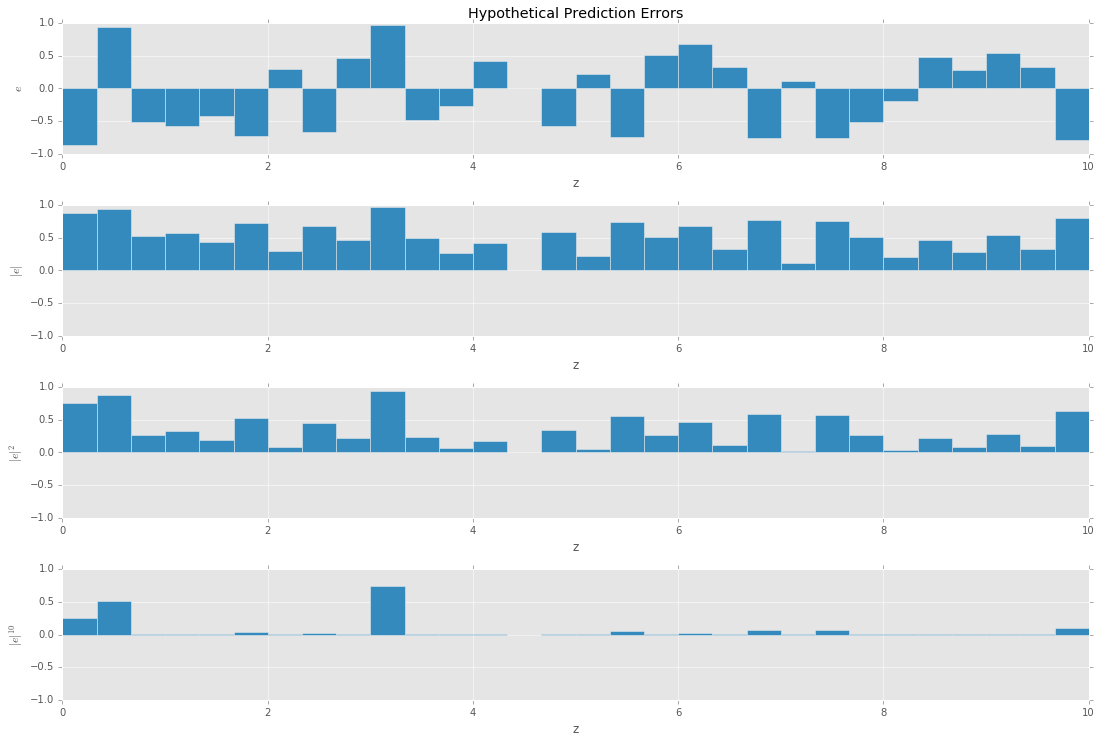

In [2]:
# HYPOTHETICAL PREDICTION ERROR

# x-axis data
z = np.arange(31) / 3

# randomly sampled "errors" from uniform distribution
e = np.random.uniform(-1, 1, 31)

# calculate different norms
e1 = abs(e)
E1 = sum(e1)
e2 = np.power(abs(e), 2)
E2 = sum(e2)**0.5
e10 = np.power(abs(e), 10)
E10 = sum(e10)**0.1

# output error summary
print("Norms\n", "E1:", E1, "E2:", E2, "E10:", E10)

# build figure
plt.subplots(4, 1, figsize=(15, 10))
plt.tight_layout(h_pad=3)

# plot errors
plt.subplot(411)
plt.bar(z-(z[1]-z[0]), e, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$e$')
plt.title('Hypothetical Prediction Errors')

# plot absolute errors
plt.subplot(412)
plt.bar(z-(z[1]-z[0]), e1, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|$')

# plot squared errors
plt.subplot(413)
plt.bar(z-(z[1]-z[0]), e2, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|^2$')

# plot errors to the tenth order
plt.subplot(414)
plt.bar(z-(z[1]-z[0]), e10, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|^{10}$')

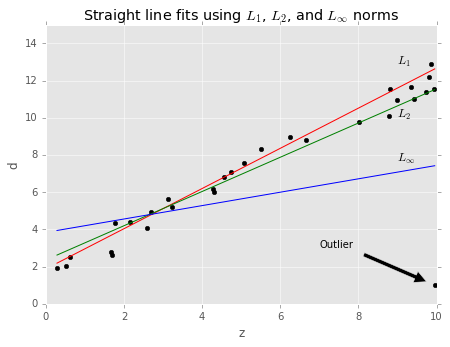

In [3]:
# STRAIGHT LINE FITS UNDER DIFFERENT NORMS

# simulated x-axis data
z = np.sort(np.random.uniform(0, 10, 30))

# simulated observed data
dobs = 2.0 + 1.0 * z + np.random.normal(0, 0.5, 30)

# one terrible outlier
dobs[dobs.shape[0]-1] = 1

# populate a grid with errors
E1 = np.zeros((101, 101))
E2 = np.zeros((101, 101))
Einf = np.zeros((101, 101))
for i in range(0, 101):
    for j in range(0, 101):
        # predicted data
        a0 = 0.04 * (i-1)
        b0 = 0.04 * (j-1)
        dpre = a0 + b0 * z
        
        # calculate errors
        e = dobs - dpre
        
        # calculate norm matrix elements
        abse = abs(e)
        E1[i, j] = np.sum(abse)
        E2[i, j] = np.sum(np.power(abse, 2))
        Einf[i, j] = np.sum(np.power(abse, 20))   # cheating; using large but finite power

# define predicted data for L1 norm
i1 = np.unravel_index(E1.argmin(), E1.shape)
dpre1 = 0.04*(i1[0]) + 0.04*(i1[1]) * z

# define predicted data for L2 norm
i2 = np.unravel_index(E2.argmin(), E2.shape)
dpre2 = 0.04*(i2[0]) + 0.04*(i2[1]) * z

# define predicted data for Linf norm
iinf = np.unravel_index(Einf.argmin(), Einf.shape)
dpreinf = 0.04*(iinf[0]) + 0.04*(iinf[1]) * z

# build figure
plt.subplots(1, 1, figsize=(7, 5))
ax = plt.subplot(111)

# plot observed data
plt.scatter(z, dobs, color='black')

# plot L1, L2, and Linf norm's
plt.plot(z, dpre1, color='red')
plt.plot(z, dpre2, color='green')
plt.plot(z, dpreinf, color='blue')

# annotations
ax.text(9, dpre1[29]+0.25, '$L_1$', fontsize=12)
ax.text(9, dpre2[29]-1.5, '$L_2$', fontsize=12)
ax.text(9, dpreinf[29]+0.25, '$L_\infty$', fontsize=12)
ax.annotate('Outlier', xy=(z[29], dobs[29]), xytext=(7, 3), arrowprops=dict(facecolor='black', shrink=0.1),)

# plot params
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Straight line fits using $L_1$, $L_2$, and $L_\infty$ norms')

The $L_2$ norm implies that hte data obey Gaussian statistics.  Gaussians are rather short-tailed functions, so it is appropriate to place considerable weight on any data that have a large prediction error.  

The likelihood of an observed datum falling far from the trend depends on the shape of the distribution for that datum.  Long-tailed distributions imply many scattered (improbable) points.  Short-tailed distributions imply very few scattered points.  The choice of a norm, therefore, implies an assertion that the data obey a particular type of statistics.  

Check on areas
 True: 1 Estimate 1: 0.999999563025 Estimate 2: 0.875550505095


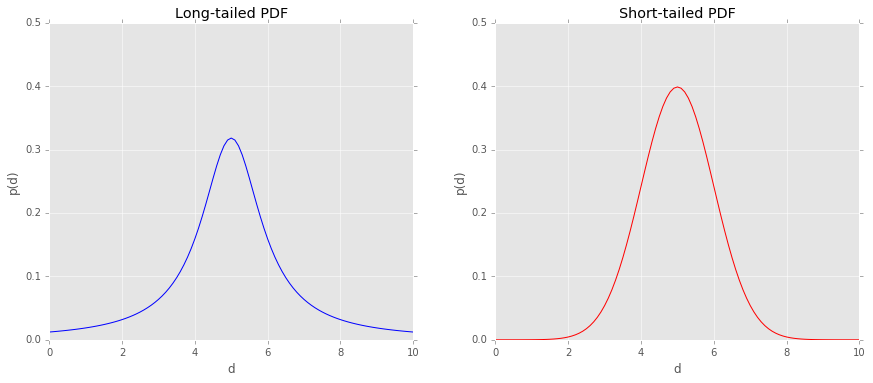

In [4]:
# LONG VS SHORT-TAILED PROBABILITY DENSITY FUNCTIONS

import math

# x-axis data
d = np.arange(101) / 10

# short-tailed probability density function (Normal PDF)
dbar = 5
sd = 1.0
d2 = np.power(d-dbar, 2)
p1 = np.exp(-0.5 * d2 / sd**2) / (math.sqrt(2*math.pi)*sd)
A1 = 0.1 * sum(p1)

# long-tailed distribution (Cauchy-Lorentz distribution)
g = 1
p2 = 1 / (math.pi * g * (1 + d2 / (g**2)))
A2 = 0.1 * sum(p2)

# check on areas
print('Check on areas\n', 'True:', 1, 'Estimate 1:', A1, 'Estimate 2:', A2)

# build figure
plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout(w_pad=5)
ax = plt.subplot(121)

plt.plot(d, p2, color='blue')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.title('Long-tailed PDF')

ax = plt.subplot(122)

plt.plot(d, p1, color='red')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.title('Short-tailed PDF')

Even though many measurements have approximately Gaussian statistics, most data sets generally have a few outliers that are wildly improbable.  The occurrence of these points demonstrates that the assumption of Gaussian statistics is in error, especially in the tails of the distribution.  If one applies least squares to this kind of problem, the estimates of the model parameters can be completely erroneous.  Least squares weights large errors so heavily that even one "bad" data point can completely throw off the result.  In these situations, methods based on the $L_1$ norm give more reliable estimates.  (Methods that can tolerate a few bad data are said to be *robust*.)  

Matrix norms can be defined in a manner similar to vector norms.  Vector and matrix norms obey the following relationships.  

*Vector norms:*
\begin{equation*}
\| \mathbf{x} \| > 0 \: \text{as long as} \: \mathbf{x} \neq 0 \\
\| a \mathbf{x} \| = |a| \| \mathbf{x} \| \\
\| \mathbf{x} + \mathbf{y} \| \leq \| \mathbf{x} \| + \| \mathbf{y} \|
\end{equation*}  

*Matrix norms:*  
\begin{equation*}
\| \mathbf{A} \|_2 = \left( \sum_{i=1}^N \sum_{j=1}^N A_{ij}^2 \right)^{1/2} \\
\| c \mathbf{A} \| = |c| \| \mathbf{A} \| \\
\| \mathbf{Ax} \| \leq \| \mathbf{A} \| \| \mathbf{x} \| \\
\| \mathbf{AB} \| \leq \| \mathbf{A} \| \| \mathbf{B} \| \\
\| \mathbf{A} + \mathbf{B} \| \leq \| \mathbf{A} \| + \| \mathbf{B} \|
\end{equation*}  

The final *vector* and *matrix* norms equations shown are called *triangle inequalities* because of their similarity to Pythagoras's law for right triangles.  

### 3.3 Least squares for a straight line  

The elementary problem of fitting a straight line to data illustrates the basic procedures applied in this technique.  The model is the assertion that the data can be described by the linear equation $d_i=m_1+m_2 z_i$.  Note that there are two model parameters, *M*=2, and that typically there are many more than two data, *N>M*.  Since a line is defined by precisely two points, it is clearly impossible to choose a straight line that passes through every one of the data, except in the instance that they all lie precisely on the same straight line.  Collinearity rarely occurs when measurements are influenced by noise.  

The fact that the equation $d_i=m_1+m_2z_i$ canot be satisfied for every *i* means that the inverse problem is *overdetermined*; that is, it has no solution for which **e**=0.  One therefore seeks values of the model parameters that solve $d_i=m_1+m_2z_i$ approximately, where the goodness of the approximation is defined by the error.  

\begin{equation*}
E = \mathbf{e}^{\text{T}} \mathbf{e} = \sum_{i=1}^N (d_i - m_1 - m_2 z_i)^2
\end{equation*}  

This problem is then the elementary calculus problem of locating the minimum of the function $E(m_1, m_2)$ and is solved by setting the derivatives of $E$ to zero and solving the resulting equations.  

\begin{equation*}
\frac{\partial E}{\partial m_1} = \frac{\partial}{\partial m_1} \sum_{i=1}^N [d_i - m_1 - m_2 z_i]^2 = 2Nm_1 + 2M_2 \sum_{i=1}^N z_i - 2 \sum_{i=1}^N d_i = 0 \\
\frac{\partial E}{\partial m_2} = \frac{\partial}{\partial m_2} \sum_{i=1}^N [d_i - m_1 - m_2 z_i]^2 = 2m_1 \sum_{i=1}^N z_i + 2m_2 \sum_{i=1}^N z_i^2 - 2 \sum_{i=1}^N z_id_i=0
\end{equation*}  

This is because the definition for the derivative generalized for finite sums is.  

\begin{equation*}
\frac{d}{dx} \left( \sum_{i=1}^N f_i(x) \right) = 
\frac{d}{dx} \left( f_1(x) + f_2(x) + \cdots + f_n(x) \right) = 
\frac{d}{dx} f_1(x) + \frac{d}{dx} f_2(x) + \cdots + \frac{d}{dx} f_n(x)
\qquad \text{so} \qquad
\frac{d}{dx} \left( \sum_{i=1}^N f_i(x) \right) = \sum_{i=1}^N \left( \frac{d}{dx} f_i(x) \right)
\end{equation*}

These two equations are then solved simultaneously for $m_1$ and $m_2$, yielding the classic formulas for the least squares fitting of a line.  

### 3.4 The least squares solution of the linear inverse problem  

Least squares can be extended to the general linear inverse problem in a very straightforward manner.  Again, one computes the derivative of the error *E* with respect to one of the model parameters, say, $m_q$, and sets the result to zero.  The error *E* is.  

\begin{equation*}
E = \mathbf{e}^T \mathbf{e} = (\mathbf{d} - \mathbf{Gm})^T(\mathbf{d}-\mathbf{Gm}) = \sum_{i=1}^N \left[ d_i - \sum_{j=1}^M G_{ij}m_j \right] \left[ d_i - \sum_{k=1}^M G_{ik}m_k \right]
\end{equation*}  

Note that the indices on the sums within the parentheses are different dummy variables, to prevent confusion.  Multiplying out the terms and reversing the order of the summations lead to.  

\begin{equation*}
E = \sum_{j=1}^M \sum_{k=1}^M m_j m_k \sum_{i=1}^N G_{ij} G_{ik} - 2 \sum_{j=1}^M m_j \sum_{i=1}^N G_{ij}d_i + \sum_{i=1}^N d_i d_i
\end{equation*}  

The derivatives $\partial E / \partial m_q$ are now computed.  Performing this differentiation term by term gives  

\begin{equation*}
\frac{\partial}{\partial m_q} \left[ \sum_{j=1}^M \sum_{k=1}^M m_j m_k \sum_{i=1}^N G_{ij} G_{ik} \right] = 
\sum_{j=1}^M \sum_{k=1}^M [\delta_{jq} m_k + m_j \delta_{kq}] \sum_{i=1}^N G_{ij} G_{ik} = 2 \sum_{k=1}^M m_k \sum_{i=1}^N G_{iq} G_{ik}
\end{equation*}  

for the first term.  Since the model parameters are independent variables, derivatives of the form $\partial m_i / \partial m_j$ are either unity, when $i=j$, or zero, when $i \neq j$.  Thus, $\partial m_i / \partial m_j$ is just the Kronecker delta $\delta_{ij}$ and the formula containing it can be simplified trivially.  The second term gives  

\begin{equation*}
-2 \frac{\partial}{\partial m_q} \left[ \sum_{j=1}^M m_j \sum_{i=1}^N G_{ij} d_i \right] = -2 \sum_{j=1}^M \delta_{jq} \sum_{i=1}^N G_{ij} d_i = -2 \sum_{i=1}^N G_{iq} d_i
\end{equation*}  

Since the third term does not contain any $m$'s, it is zero as  

\begin{equation*}
\frac{\partial}{\partial m_q} \left[ \sum_{i=1}^N d_i d_i \right] = 0
\end{equation*}  

Combining these three terms gives  

\begin{equation*}
\frac{\partial E}{\partial m_q} = 0 = 2 \sum_{k=1}^M m_k \sum_{i=1}^N G_{iq} G_{ik} - 2 \sum_{i=1}^N G_{iq} d_i
\end{equation*}  

Writing this equation in matrix notation yields  

\begin{equation*}
\mathbf{G}^T \mathbf{Gm} - \mathbf{G}^T \mathbf{d} = 0
\end{equation*}  

Note that the quantity $\mathbf{G}^T \mathbf{G}$ is a square *MxM* matrix and that it multiplies a vector **m** of length *M*.  The quantity $\mathbf{G}^T\mathbf{d}$ is also a vector of length *M*.  This equation is therefore a square matrix equation for the unknown model parameters.  Presuming that $[\mathbf{G}^T \mathbf{G}]^{-1}$ exists (an important question), we have the following estimate for the model parameters:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^T \mathbf{G}]^{-1} \mathbf{G}^T \mathbf{d}
\end{equation*}  

which is the least squares solution to the inverse problem **Gm=d**.  

When the dimensions of **G** are small (say, *N* and *M* less than a few hundred), the least squares solution can be computed as:

In [5]:
# STRAIGHT LINE PROBLEM: Least squares fit to synthetic data

# x-axis synthetic data
z = np.sort(np.random.uniform(0, 10, 30))

# observed synthetic data (d = a + bz + noise)
dobs = 2.0 + 1.0 * z + np.random.normal(0, 1.0, 30)

# data kernel
M = 2
G = np.array([np.ones(30), z])

# standard matrix solution
mest1 = inv(G.dot(np.transpose(G))).dot(G.dot(dobs)).reshape(2,1)
dpre1 = np.transpose(G).dot(mest1)

However, for larger problems, the computational cost of computing $\mathbf{G}^T \mathbf{G}$ can be prohibitive.  Furthermore, $\mathbf{G}^T \mathbf{G}$ is rarely as sparse as **G** itself.  In this case, an iterative matrix solve, such as the *biconjugate gradient algorithm*, is preferred.  This algorithm only requires products of the form $\mathbf{G}^T \mathbf{Gv}$, where **v** is a vector constructed by the algorithm, and this product can be performed as $\mathbf{G}^T(\mathbf{Gv})$ so that $\mathbf{G}^T \mathbf{G}$ is never explicitly calculated.  SciPy provides the *bicg* function for this!

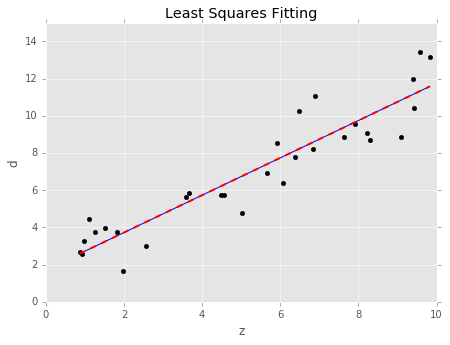

In [7]:
# LARGER PROBLEMS - Use biconjugate gradient algorithm

from scipy.sparse.linalg import bicg

# biconjugate gradient solution (THIS PROBABLY ISN'T RIGHT ...)
mest2 = bicg(G.dot(np.transpose(G)), G.dot(dobs), tol=1e-06, maxiter=90)[0]
dpre2 = np.transpose(G).dot(mest2)

# build figure
plt.subplots(1,1, figsize=(7,5))

# PLOT 1: Simulated data and least squares solution
plt.subplot(111)

# simulated data
plt.scatter(z, dobs, color="black")

# least squares solution and biconjugate gradient solution
plt.plot(z, dpre1, color="blue")
plt.plot(z, dpre2, color='red', ls='dashed', lw=2)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Least Squares Fitting')
plt.xlabel('z')
plt.ylabel('d')

### 3.5 Some examples  

#### 3.5.1 The straight line problem  

In the straight line problem, the model is $d_i = m_1 + m_2 z_i$, so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & z_1 \\
1 & z_2 \\
\vdots & \vdots \\
1 & z_N
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2
\end{bmatrix} = 
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

In Python, the matrix **G** can be created with the command *G = np.array([np.ones(30), z])*.  

The matrix products required by the least squares solution are:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N
\end{bmatrix}
\begin{bmatrix}
1 & z_1 \\ 1 & z_2 \\ \vdots & \vdots \\ 1 & z_N
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2
\end{bmatrix} \\ \\
\text{and} \\ \\
\mathbf{G}^{\text{T}} \mathbf{d} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i
\end{bmatrix} \\
\end{equation*}  

This gives the least squares solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2
\end{bmatrix}^{-1} 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i
\end{bmatrix} \\
\end{equation*}  

#### 3.5.2 Fitting a parabola  

The problem of fitting a parabola is a trivial generalization of fitting a straight line.  Now the model is $d_1 = m_1 + m_2 z_i + m_3 z_i^2$, so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & z_1 & z_1^2 \\ 1 & z_2 & z_2^2 \\ \vdots & \vdots & \vdots \\ 1 & z_N & z_N^2
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2 \\ m_3
\end{bmatrix} = 
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

In Python, the matrix **G** can be created with the command *G = np.array([np.ones(30), z, np.power(z,2)])*.  The matrix products required by the least squares solution are as follows:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N \\
z_1^2 & z_2^2 & \cdots & z_N^2
\end{bmatrix}
\begin{bmatrix}
1 & z_1 & z_1^2 \\
1 & z_2 & z_2^2 \\
\vdots & \vdots & \vdots \\
1 & z_N & z_N^2
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 \\
\sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 & \sum_{i=1}^N z_i^4
\end{bmatrix} \\
\text{and} \\
\mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N \\
z_1^2 & z_2^2 & \cdots & z_N^2
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i \\ \sum_{i=1}^N z_i^2 d_i
\end{bmatrix}
\end{equation*}  

Giving the least squares solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 \\
\sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 & \sum_{i=1}^N z_i^4
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N z_i d_i \\ \sum_{i=1}^N z_i^2 d_i
\end{bmatrix} \\
\end{equation*}  

The following shows an example of using a quadratic fit to examine Kepler's third law which states that the cube of the orbital radius of a planet equals the square of its orbital period.

      Radius      Period
0   57909100    87.96900
1  108208930   224.70000
2  149598261   365.25636
3  227939100   686.97100
4  413832587  1680.50000
mest=
 [-0.02533066  0.00998026  0.02499574]


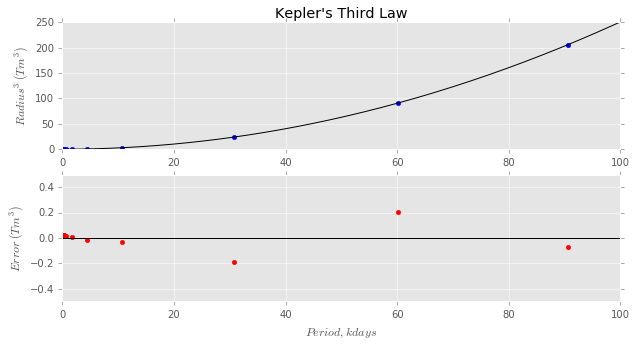

In [28]:
import pandas as pd

# read in data and print first few rows
df = pd.read_csv("../data/planetary.txt", delim_whitespace=True, header=None, names=["Radius", "Period"])
print(df.head())

# load radius and period into numpy arrays
#    divide by 10**9 and 10**3 respectively - computers don't like really big numbers (especially when applying powers)
radius = df.Radius.values / 10**9
period = df.Period.values / 10**3

# take radius**3 to be the observation, period to be auxiliary variable
dobs = np.power(radius, 3)
z = period

# build system matrix G
G = np.array([np.ones(z.shape[0]), z, np.power(z, 2)])
mest = inv(G.dot(np.transpose(G))).dot(G.dot(dobs))
print('mest=\n', mest)

# calculate predicted data and error
dpre = np.transpose(G).dot(mest)
e = dobs - dpre

# build smooth parabola for display, lot's of z's!
zeval = np.arange(0, 251) / 2.5
deval = mest[0] + mest[1] * zeval + mest[2] * np.power(zeval, 2)

plt.subplots(2, 1, figsize=(10, 5))

plt.subplot(211)
plt.scatter(z, dobs, color='blue')
plt.plot(zeval, deval, color='black')
plt.xlim(0,100)
plt.ylim(0,250)
plt.xlabel(r'$Period, kdays$')
plt.ylabel(r'$Radius^3 \: (Tm^3)$')
plt.title('Kepler\'s Third Law')

plt.subplot(212)
plt.scatter(z, e, color='red')
plt.plot(zeval, np.zeros(zeval.shape[0]), color='black')
plt.xlim(0,100)
plt.ylim(-0.5, 0.5)
plt.xlabel(r'$Period, kdays$')
plt.ylabel(r'$Error \: (Tm^3)$')

#### 3.5.3 Fitting a plane surface  

To fit a plane surface, two auxiliary variables, say, *x* and *y*, are needed.  The model is:  

\begin{equation*}
d_i = m_1 + m_2 x_i + m_3 y_i
\end{equation*}  

so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
1 & x_N & y_N
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2 \\ m_3
\end{bmatrix} =
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

Now let's try this in *Python* to make a planar fit to depths of earthquakes in the Kurile subduction zone.  

     lat     lon  depth
0  48.16  146.82    430
1  43.92  147.47     53
2  45.21  148.57    113
3  50.44  156.28     59
4  50.83  157.10     54


(-700, 0)

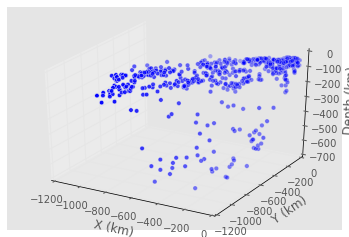

In [69]:
from mpl_toolkits.mplot3d import Axes3D

# read Kurile subduction zone data
df = pd.read_csv("../data/kurile_eqs.txt", delim_whitespace=True, header=None, names=["lat", "lon", "depth"])
print(df.head())

# convert to array and fix units to kilometers
x = 111.12 * np.cos((math.pi/180) * np.mean(df.lat.values)) * (df.lon.values - np.min(df.lon.values))
y = 111.12 * (df.lat.values - np.min(df.lat.values))
z = -1 * df.depth.values

# build figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot data
ax.scatter(-x, -y, z)

# graph params
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')
ax.set_xlim3d(-1200, 0)
ax.set_ylim3d(-1200, 0)
ax.set_zlim3d(-700, 0)

In *Python*, the matrix **G** can be created with the command *G = np.array([np.ones(z.shape[0]), x, y])* forming the matrix products $\mathbf{G}^{\text{T}} \mathbf{G}$:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_N \\
y_1 & y_2 & \cdots & y_N 
\end{bmatrix}
\begin{bmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
1 & x_N & y_N
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N y_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i y_i \\
\sum_{i=1}^N y_i & \sum_{i=1}^N x_i y_i & \sum_{i=1}^N y_i^2
\end{bmatrix} \\
\text{and} \\
\mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_N \\
y_1 & y_2 & \cdots & y_N
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N x_i d_i \\ \sum_{i=1}^N y_i d_i
\end{bmatrix} \\
\text{giving the least squares solution} \\
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N y_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i y_i \\
\sum_{i=1}^N y_i & \sum_{i=1}^N x_i y_i & \sum_{i=1}^N x_i y_i^2
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N x_i d_i \\ \sum_{i=1}^N y_i d_i
\end{bmatrix} \\
\end{equation*}  

Applying this to determine a planar fit of a geologic fault using earthquake data along the Kurile subduction zone is shown below!  Neat!

(-700, 0)

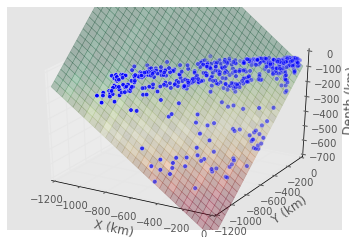

In [71]:
from matplotlib.colors import Normalize
from matplotlib import cm

# setup and solve the inverse problem
G = np.array([np.ones(z.shape[0]), x, y])
mest = inv(G.dot(np.transpose(G))).dot(G.dot(z))
dpre = np.transpose(G).dot(mest)

# setup and calculate values for mesh surface
xx = 1200 * np.arange(0, 31) / 30
yy = 1200 * np.arange(0, 31) / 30
X, Y = np.meshgrid(xx, yy)
Z = mest[0] + mest[1] * X + mest[2] * Y

# build figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# choose any colormap e.g. cm.jet, cm.coolwarm, etc.
color_map = cm.RdYlGn # reverse the colormap: cm.RdYlGn_r
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=-700, vmax=0), cmap=color_map)
C = scalarMap.to_rgba(Z)

# plot data and model
ax.scatter(-x, -y, z)
ax.plot_surface(-X, -Y, Z, rstride=1, cstride=1, facecolors=C, antialiased=True, alpha=0.3)

# graph params
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')
ax.set_xlim3d(-1200, 0)
ax.set_ylim3d(-1200, 0)
ax.set_zlim3d(-700, 0)